In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dir = "/content/drive/MyDrive/SafeReels-664/Extracted_Features"

In [4]:
X = []

In [5]:
for file in os.listdir(dir):
    if file.endswith(".npy"):
        file_path = os.path.join(dir, file)
        features = np.load(file_path)
        X.append(features)

In [6]:
X = np.array(X, dtype=np.float32)

In [7]:
X.shape

(664, 21160)

In [8]:
import pandas as pd
df = pd.read_csv("/content/Safereels annotation - Text_Annotation_data.csv")
df

,reel_id,isSafe,UnsafeType,Visual texts,Audio texts
0,www.facebook.com/reel/1000188341415358,1,Safe,Me on my way to watch Oppenheimer After Berbie,NaN
1,www.facebook.com/reel/1006146964533997,1,Safe,NaN,এ মামা দুইটা সিঙ্গারা আর দুইটা সমুচা একটু তাড়া...
2,www.facebook.com/reel/1007123741459823,0,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,পাগলা হাওয়ার বাদল দিনে পাগল আমার মন জেগে ওঠে প...
3,www.facebook.com/reel/1007420607202244,1,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,যুদ্ধ আনে ধ্বংস সজনী সজনী তোমারে দেখিয়া মাতাল ...
4,www.facebook.com/reel/1008519870870927,1,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,NaN
...,...,...,...,...,...
659,www.facebook.com/reel/997262608752854,0,Adult,NaN,NaN
660,www.facebook.com/reel/997300345735398,0,Harmful,NaN,NaN
661,www.facebook.com/reel/998187401354206,1,Safe,খবরঃ কয়লা নিয়ে মোংলা বন্দরে এলো চীনের জাহাজ দে...,NaN
662,www.facebook.com/reel/999558344609179,1,Safe,সাকিব আল হাসান to বাংলাদেশী ক্রিকেট ফ্যান,NaN


In [9]:
df['UnsafeType'], uniques = pd.factorize(df['UnsafeType'])
uniques

Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [10]:
y = df['UnsafeType'].tolist()

In [11]:
y = np.array(y)
y.shape

(664,)

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
input_dim = X.shape[1]  # Feature size
X_train = X_train.reshape(-1, input_dim)
X_test = X_test.reshape(-1, input_dim)

In [17]:
encoding_dim = 32

In [18]:
input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation="relu")(input_layer)
decoded = layers.Dense(input_dim, activation="sigmoid")(encoded)

In [19]:
autoencoder = keras.Model(input_layer, decoded)
encoder = keras.Model(input_layer, encoded)

In [20]:
autoencoder.compile(optimizer="adam", loss="mse")

In [21]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_data=(X_test, X_test))

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.0096 - val_loss: 0.9654
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.9733 - val_loss: 0.9305
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.7749 - val_loss: 0.9138
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.8145 - val_loss: 0.9050
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.8091 - val_loss: 0.8973
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.7603 - val_loss: 0.8932
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.7003 - val_loss: 0.8881
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.7676 - val_loss: 0.8836
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.8318 - val_loss: 0.8807
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.8701 - val_loss: 0.8793
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.7945 - val_loss: 0.8752
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.7

In [22]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [23]:
classifier = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(encoding_dim,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(4, activation="softmax")  # 4-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
classifier.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [25]:
classifier.fit(X_train_encoded, y_train, epochs=20, batch_size=16, validation_data=(X_test_encoded, y_test))

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2875 - loss: 36.3758 - val_accuracy: 0.5338 - val_loss: 11.9718
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5044 - loss: 10.2465 - val_accuracy: 0.4662 - val_loss: 6.2655
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5053 - loss: 5.9288 - val_accuracy: 0.4286 - val_loss: 4.8122
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5064 - loss: 3.8244 - val_accuracy: 0.4737 - val_loss: 4.4356
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4999 - loss: 4.2664 - val_accuracy: 0.4586 - val_loss: 3.9951
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5555 - loss: 2.9816 - val_accuracy: 0.4361 - val_loss: 3.9282
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5527 - loss: 2.8394 - val_accuracy: 0.4586 - val_loss: 3.6933
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5786 - loss: 2.3502 - val_accuracy: 0.4586 - val_l

In [26]:
y_pred = classifier.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [27]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        83
           1       0.17      0.11      0.13        36
           2       0.25      0.31      0.28        13
           3       0.00      0.00      0.00         1

    accuracy                           0.49       133
   macro avg       0.26      0.28      0.27       133
weighted avg       0.46      0.49      0.47       133



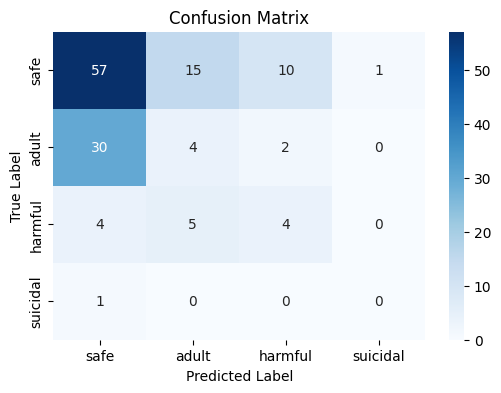

In [28]:
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["safe","adult","harmful","suicidal"], yticklabels=["safe","adult","harmful","suicidal"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()